## 🔍 LA Crimes Analysis (2012–2016)

📊 An Exploratory Data Analysis (EDA) Project  
Using real-world crime data from **Kaggle** 

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Overview

The dataset is loaded and inspected for missing values, structure, and general statistics. Columns are renamed for clarity.

In [245]:
# Load the dataset
df = pd.read_csv("LA_Crimes_2012_to_2016.csv")
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Date.Rptd            0
DR.NO                0
DATE.OCC             0
TIME.OCC             0
AREA                 0
AREA.NAME            0
RD                   0
Crm.Cd               0
CrmCd.Desc         158
Status               0
Status.Desc          0
LOCATION             0
Cross.Street    816574
Location.1        4397
dtype: int64


In [246]:
# Data Frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136589 entries, 0 to 1136588
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Date.Rptd     1136589 non-null  object
 1   DR.NO         1136589 non-null  int64 
 2   DATE.OCC      1136589 non-null  object
 3   TIME.OCC      1136589 non-null  int64 
 4   AREA          1136589 non-null  int64 
 5   AREA.NAME     1136589 non-null  object
 6   RD            1136589 non-null  int64 
 7   Crm.Cd        1136589 non-null  int64 
 8   CrmCd.Desc    1136431 non-null  object
 9   Status        1136589 non-null  object
 10  Status.Desc   1136589 non-null  object
 11  LOCATION      1136589 non-null  object
 12  Cross.Street  320015 non-null   object
 13  Location.1    1132192 non-null  object
dtypes: int64(5), object(9)
memory usage: 121.4+ MB


In [247]:
# Data Frame Head
df.head()

,Date.Rptd,DR.NO,DATE.OCC,TIME.OCC,AREA,AREA.NAME,RD,Crm.Cd,CrmCd.Desc,Status,Status.Desc,LOCATION,Cross.Street,Location.1
0,03/20/2013,132007717,03/20/2013,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)"
1,03/10/2013,130608787,03/10/2013,445,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)"
2,12/18/2013,131820260,12/18/2013,745,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)"
3,10/18/2013,131817514,10/18/2013,1730,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)"
4,05/26/2013,130510483,05/25/2013,2000,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)"


In [248]:
headers = ['Date Reported','DR No.','Date Occured','Time Occured','Area Code','Area Name','Reporting District','Crime Code',
           'Crime Description', 'Status', 'Status Description', 'Street Address','Cross Street','Location']
df.columns = headers

# Show summary statistics for all columns
df.describe(include = 'all')

,Date Reported,DR No.,Date Occured,Time Occured,Area Code,Area Name,Reporting District,Crime Code,Crime Description,Status,Status Description,Street Address,Cross Street,Location
count,1136589,1.136589e+06,1136589,1.136589e+06,1.136589e+06,1136589,1.136589e+06,1.136589e+06,1136431,1136589,1136589,1136589,320015,1132192
unique,1773,NaN,1770,NaN,NaN,21,NaN,NaN,161,9,7,206290,18761,68553
top,12/31/2013,NaN,01/01/2012,NaN,NaN,77th Street,NaN,NaN,TRAFFIC DR #,IC,Invest Cont,WESTERN AV,BROADWAY,"(0.0, 0.0)"
freq,1082,NaN,1604,NaN,NaN,77928,NaN,NaN,167051,916146,916146,1709,3181,6771
mean,NaN,1.405451e+08,NaN,1.367056e+03,1.109752e+01,NaN,1.156037e+03,5.798710e+02,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.389175e+07,NaN,6.374626e+02,5.982122e+00,NaN,5.983798e+02,2.593059e+02,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,4.180000e+02,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+02,1.100000e+02,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.306055e+08,NaN,9.300000e+02,6.000000e+00,NaN,6.450000e+02,3.410000e+02,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.410093e+08,NaN,1.430000e+03,1.100000e+01,NaN,1.181000e+03,5.100000e+02,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.514123e+08,NaN,1.900000e+03,1.600000e+01,NaN,1.664000e+03,7.450000e+02,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Feature Engineering

- Fill missing values in key columns (e.g., `Crime Description`)
- Convert string-based dates and times into structured datetime features
- Extract Year, Month, Day, Hour, and Day of Week
- Create a new column for general crime categories

In [249]:
# Fill missing 'Crime Description' with the most common value
most_common_crime = df['Crime Description'].mode()[0]
df['Crime Description'] = df['Crime Description'].fillna(most_common_crime)

df

,Date Reported,DR No.,Date Occured,Time Occured,Area Code,Area Name,Reporting District,Crime Code,Crime Description,Status,Status Description,Street Address,Cross Street,Location
0,03/20/2013,132007717,03/20/2013,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)"
1,03/10/2013,130608787,03/10/2013,445,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)"
2,12/18/2013,131820260,12/18/2013,745,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)"
3,10/18/2013,131817514,10/18/2013,1730,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)"
4,05/26/2013,130510483,05/25/2013,2000,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136584,05/01/2016,162010003,04/30/2016,2200,20,Olympic,2069,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",IC,Invest Cont,1155 ELDEN AV,NaN,"(34.0508, -118.2877)"
1136585,06/29/2016,160315990,06/29/2016,1020,3,Southwest,353,946,OTHER MISCELLANEOUS CRIME,IC,Invest Cont,3745 S VICTORIA AV,NaN,"(34.0199, -118.3363)"
1136586,05/01/2016,161200696,05/01/2016,2030,12,77th Street,1256,626,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,IC,Invest Cont,943 W 75TH ST,NaN,"(33.9717, -118.2893)"
1136587,09/05/2016,161015111,09/05/2016,800,10,West Valley,1017,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,7545 BALBOA BL,NaN,"(34.2067, -118.5014)"


In [250]:
# Convert 'Date Occured' to datetime
df['Date Occured'] = pd.to_datetime(df['Date Occured'], format='%m/%d/%Y', errors='coerce')
df['Month'] = df['Date Occured'].dt.month
df['Day'] = df['Date Occured'].dt.day
df['Year'] = df['Date Occured'].dt.year
df['Day of Week'] = df['Date Occured'].dt.day_name()

# Extract hour from 'Time Occured'
df['Time Occured'] = pd.to_numeric(df['Time Occured'], errors='coerce')
df['Hour'] = df['Time Occured'] // 100

df

,Date Reported,DR No.,Date Occured,Time Occured,Area Code,Area Name,Reporting District,Crime Code,Crime Description,Status,Status Description,Street Address,Cross Street,Location,Month,Day,Year,Day of Week,Hour
0,03/20/2013,132007717,2013-03-20,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)",3,20,2013,Wednesday,20
1,03/10/2013,130608787,2013-03-10,445,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)",3,10,2013,Sunday,4
2,12/18/2013,131820260,2013-12-18,745,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)",12,18,2013,Wednesday,7
3,10/18/2013,131817514,2013-10-18,1730,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)",10,18,2013,Friday,17
4,05/26/2013,130510483,2013-05-25,2000,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)",5,25,2013,Saturday,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136584,05/01/2016,162010003,2016-04-30,2200,20,Olympic,2069,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",IC,Invest Cont,1155 ELDEN AV,NaN,"(34.0508, -118.2877)",4,30,2016,Saturday,22
1136585,06/29/2016,160315990,2016-06-29,1020,3,Southwest,353,946,OTHER MISCELLANEOUS CRIME,IC,Invest Cont,3745 S VICTORIA AV,NaN,"(34.0199, -118.3363)",6,29,2016,Wednesday,10
1136586,05/01/2016,161200696,2016-05-01,2030,12,77th Street,1256,626,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,IC,Invest Cont,943 W 75TH ST,NaN,"(33.9717, -118.2893)",5,1,2016,Sunday,20
1136587,09/05/2016,161015111,2016-09-05,800,10,West Valley,1017,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,7545 BALBOA BL,NaN,"(34.2067, -118.5014)",9,5,2016,Monday,8


## Exploratory Data Analysis

We now visualize trends in the dataset to understand how crime varies by location, time, and category.

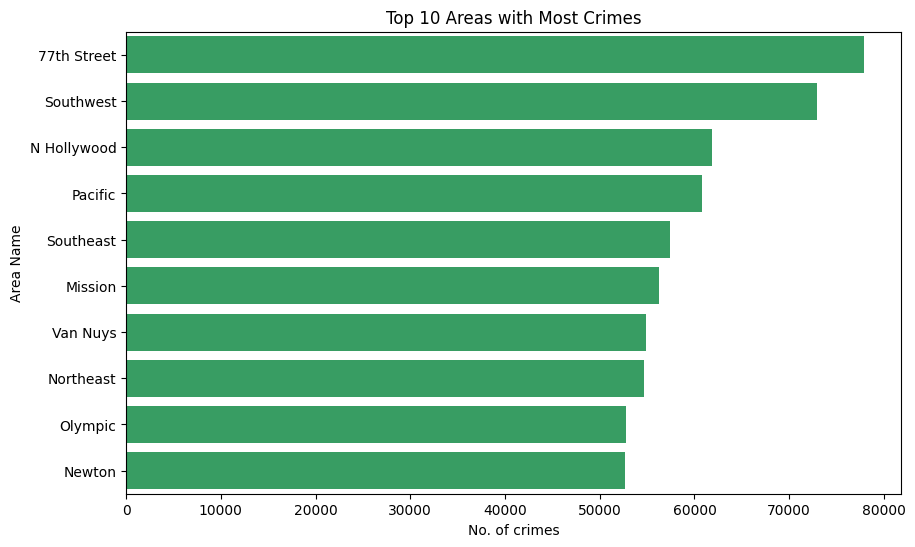

In [251]:
# Top 10 areas with the most crimes
topAreas = df["Area Name"].value_counts().head(10)
plt.figure(figsize = (10,6))
sns.barplot(x=topAreas.values, y=topAreas.index, orient='h', color = '#27ae60')
plt.title("Top 10 Areas with Most Crimes")
plt.xlabel("No. of crimes")
plt.ylabel("Area Name")
plt.show()

In [252]:
def crimeCategory(description):
    description = description.lower()
    crimeCategories = {
    'Violent Crimes' : ['assault', 'battery','robbery', 'homicide'],
    'Property Crimes' : ['burglary' ,'theft','larceny','vandalism'],
    'Traffic Offense' : ['traffic', 'dui'],
    'Drug Offense' : ['narcotics','drug'],
    'Fraud/White Collar': ['fraud', 'forgery', 'embezzlement', 'counterfeit'],
    'Sexual Offense': ['rape', 'sexual', 'molest'],
    'Weapons Violation': ['weapon', 'shots fired', 'gun'],
    'Public Disturbance': ['disturbing', 'noise', 'trespassing', 'loitering']
    }
    for category, keywords in crimeCategories.items():
        if any(word in description for word in keywords):
            return category
    return 'Other'

df['Crime Category'] = df['Crime Description'].apply(crimeCategory)

df

,Date Reported,DR No.,Date Occured,Time Occured,Area Code,Area Name,Reporting District,Crime Code,Crime Description,Status,Status Description,Street Address,Cross Street,Location,Month,Day,Year,Day of Week,Hour,Crime Category
0,03/20/2013,132007717,2013-03-20,2015,20,Olympic,2004,997,TRAFFIC DR #,UNK,Unknown,OXFORD,OAKWOOD,"(34.0776, -118.308)",3,20,2013,Wednesday,20,Traffic Offense
1,03/10/2013,130608787,2013-03-10,445,6,Hollywood,635,997,TRAFFIC DR #,UNK,Unknown,ODIN ST,CAHUENGA BL,"(34.1113, -118.3336)",3,10,2013,Sunday,4,Traffic Offense
2,12/18/2013,131820260,2013-12-18,745,18,Southeast,1839,997,TRAFFIC DR #,UNK,Unknown,105TH ST,CROESUS AV,"(33.9406, -118.2338)",12,18,2013,Wednesday,7,Traffic Offense
3,10/18/2013,131817514,2013-10-18,1730,18,Southeast,1827,997,TRAFFIC DR #,UNK,Unknown,101ST ST,JUNIPER ST,"(33.9449, -118.2332)",10,18,2013,Friday,17,Traffic Offense
4,05/26/2013,130510483,2013-05-25,2000,5,Harbor,507,440,THEFT PLAIN - PETTY (UNDER $400),UNK,Unknown,1300 W SEPULVEDA BL,NaN,"(33.8135, -118.2992)",5,25,2013,Saturday,20,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136584,05/01/2016,162010003,2016-04-30,2200,20,Olympic,2069,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",IC,Invest Cont,1155 ELDEN AV,NaN,"(34.0508, -118.2877)",4,30,2016,Saturday,22,Property Crimes
1136585,06/29/2016,160315990,2016-06-29,1020,3,Southwest,353,946,OTHER MISCELLANEOUS CRIME,IC,Invest Cont,3745 S VICTORIA AV,NaN,"(34.0199, -118.3363)",6,29,2016,Wednesday,10,Other
1136586,05/01/2016,161200696,2016-05-01,2030,12,77th Street,1256,626,SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT,IC,Invest Cont,943 W 75TH ST,NaN,"(33.9717, -118.2893)",5,1,2016,Sunday,20,Violent Crimes
1136587,09/05/2016,161015111,2016-09-05,800,10,West Valley,1017,440,THEFT PLAIN - PETTY ($950 & UNDER),IC,Invest Cont,7545 BALBOA BL,NaN,"(34.2067, -118.5014)",9,5,2016,Monday,8,Property Crimes


### Top 3 Areas by Crime Category

This chart highlights the three most affected areas for each major crime category.

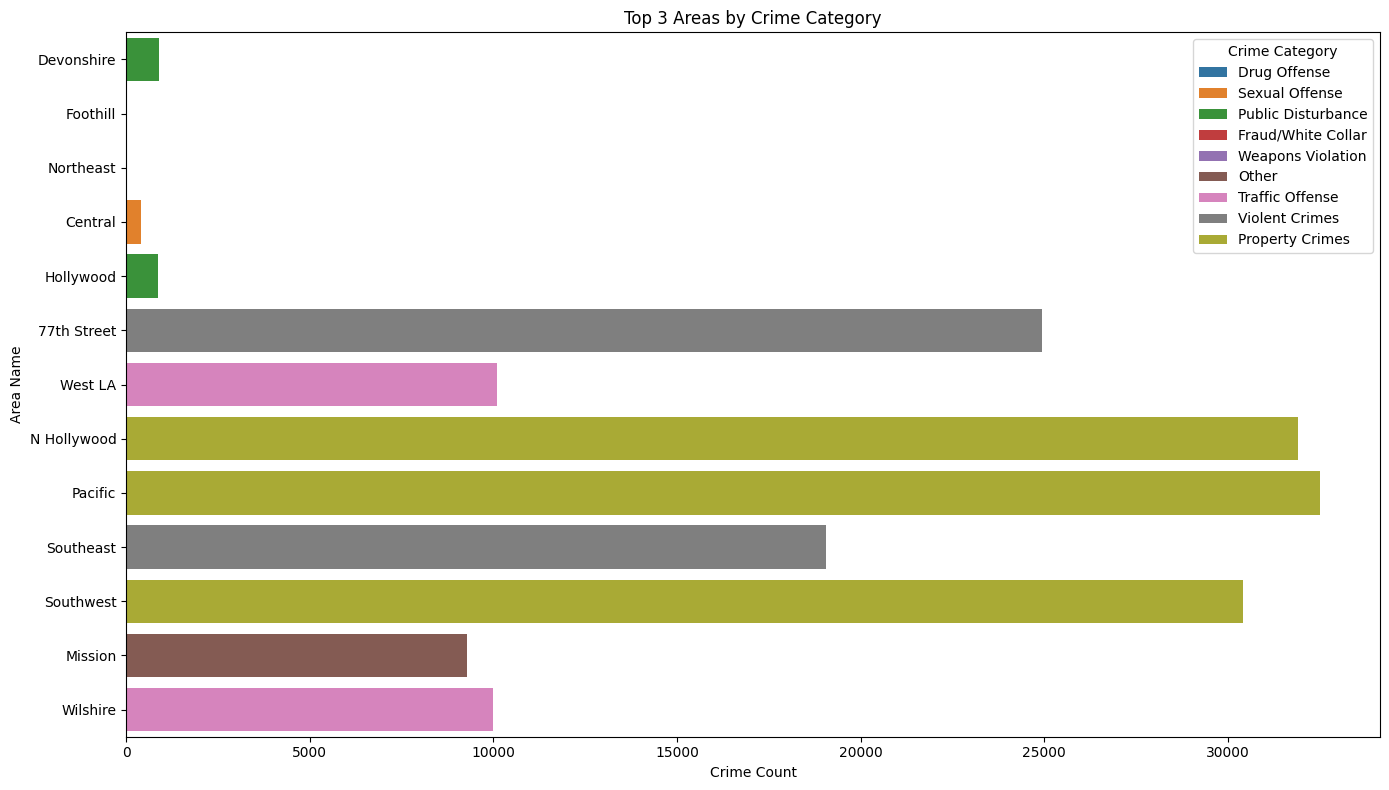

In [253]:
top_by_category = df.groupby(['Crime Category', 'Area Name']).size().reset_index(name='Count')
top3_each = top_by_category.sort_values(['Crime Category', 'Count'], ascending=False).groupby('Crime Category').head(3)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=top3_each.sort_values('Count', ascending=True), 
    x='Count', 
    y='Area Name', 
    hue='Crime Category',
    dodge = False
)

plt.title("Top 3 Areas by Crime Category")
plt.xlabel("Crime Count")
plt.ylabel("Area Name")
plt.tight_layout()
plt.show()


### Crime Distribution by Category

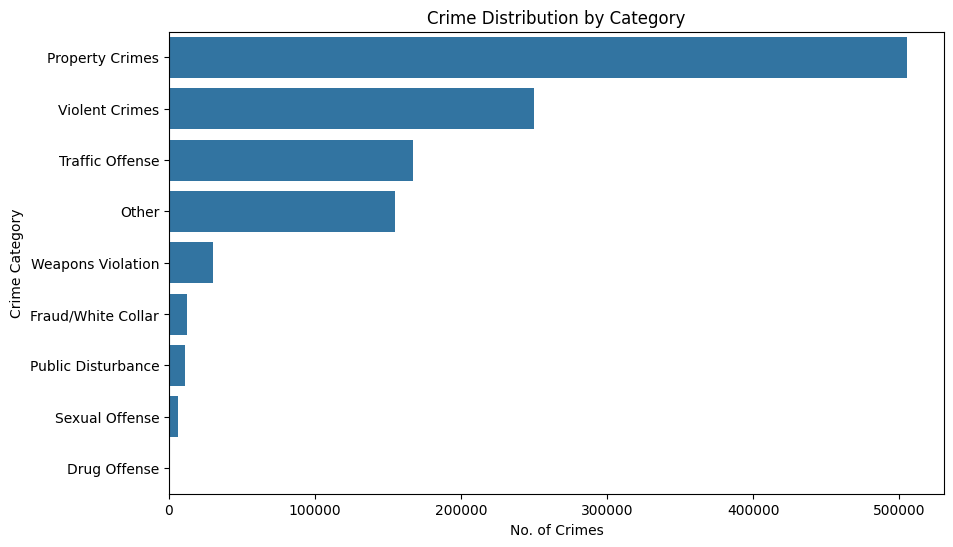

In [254]:
plt.figure(figsize=(10, 6))
sns.countplot(y = 'Crime Category', data = df, order = df['Crime Category'].value_counts().index)
plt.title("Crime Distribution by Category")
plt.xlabel("No. of Crimes")
plt.ylabel("Crime Category")
plt.show()

## Temporal Crime Trends
We analyze how crime varies over time — across years, months, and categories.

### Yearly Crime Count

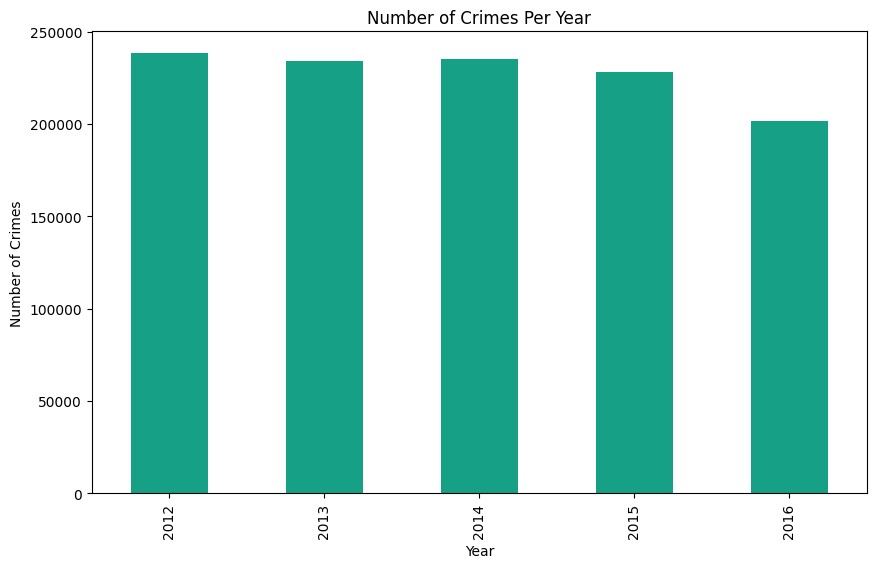

In [255]:
plt.figure(figsize=(10, 6))
df['Year'].value_counts().sort_index().plot(kind='bar', color='#16a085')
plt.title('Number of Crimes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()


### Monthly Crime Distribution

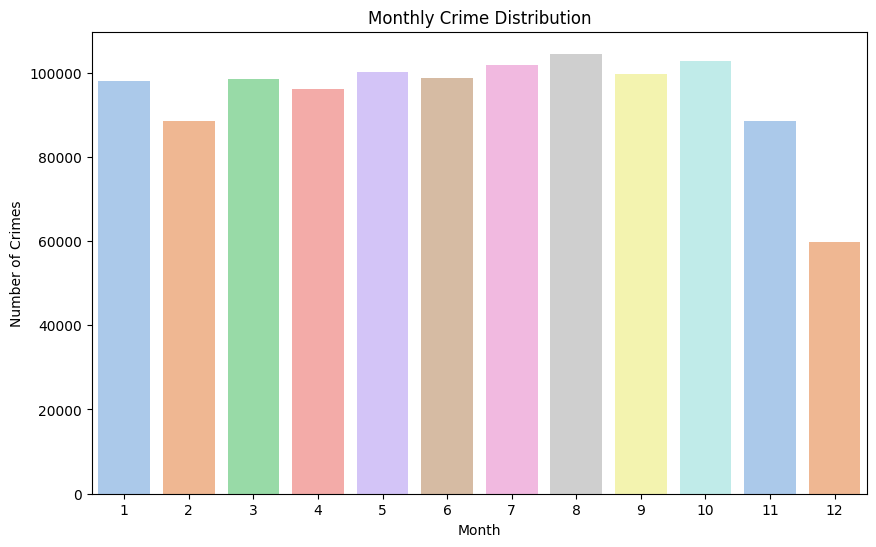

In [256]:
# Crimes over month
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', order=range(1, 13), hue = 'Month', palette='pastel', legend=False)
plt.title("Monthly Crime Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()

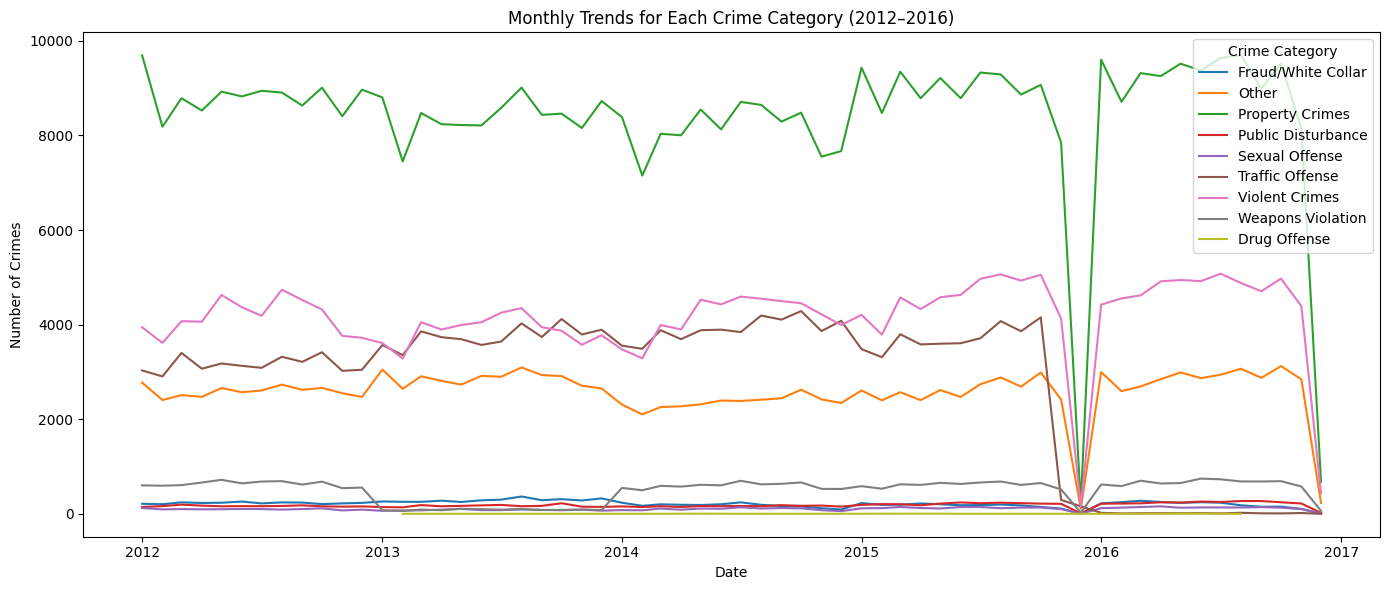

In [257]:
# Monthly Crime Trends by Category    
monthly_trends = df.groupby(['Year', 'Month', 'Crime Category']).size().reset_index(name='Count')
monthly_trends['Date'] = pd.to_datetime(monthly_trends[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_trends, x='Date', y='Count', hue='Crime Category')
plt.title("Monthly Trends for Each Crime Category (2012–2016)")
plt.ylabel("Number of Crimes")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

## Crime Timing Patterns

We investigate how crime frequency changes based on the day of the week and time of day.

### Crime Heatmap by Day and Hour

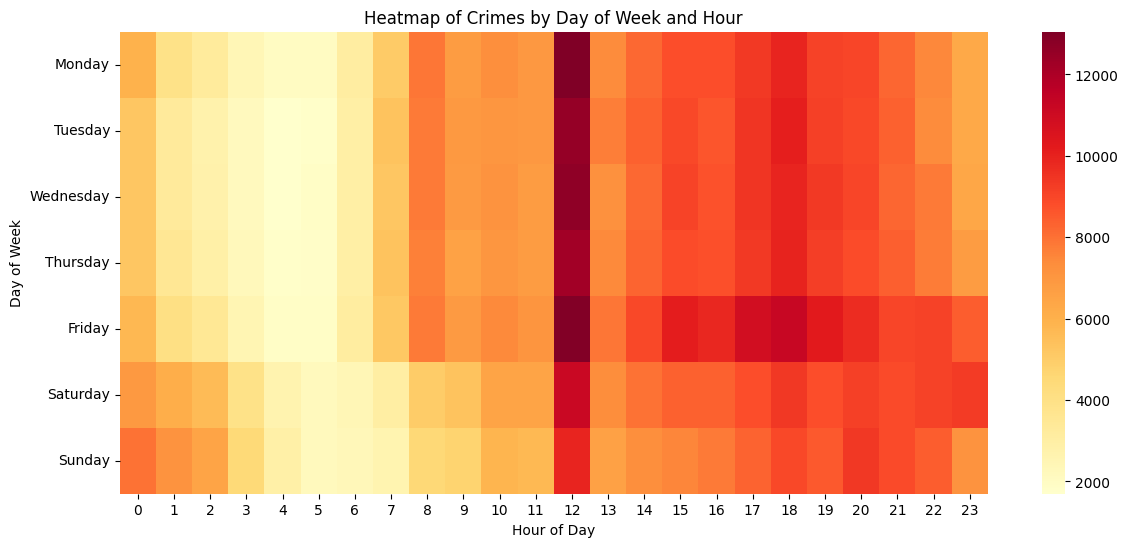

In [258]:
#  Crime Heatmap by Hour and Day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories = day_order, ordered = True)

heatmap_data = df.groupby(['Day of Week', 'Hour'], observed=True).size().unstack().fillna(0)
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd")
plt.title("Heatmap of Crimes by Day of Week and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

### Hourly Crime Trend Line

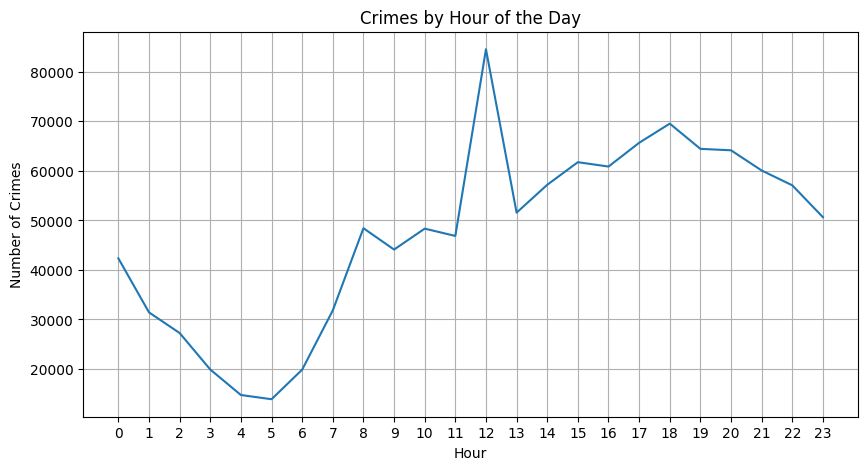

In [259]:
#Hourly Crime Trend Line Plot
hourly_crime = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_crime.index, y=hourly_crime.values)
plt.title("Crimes by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

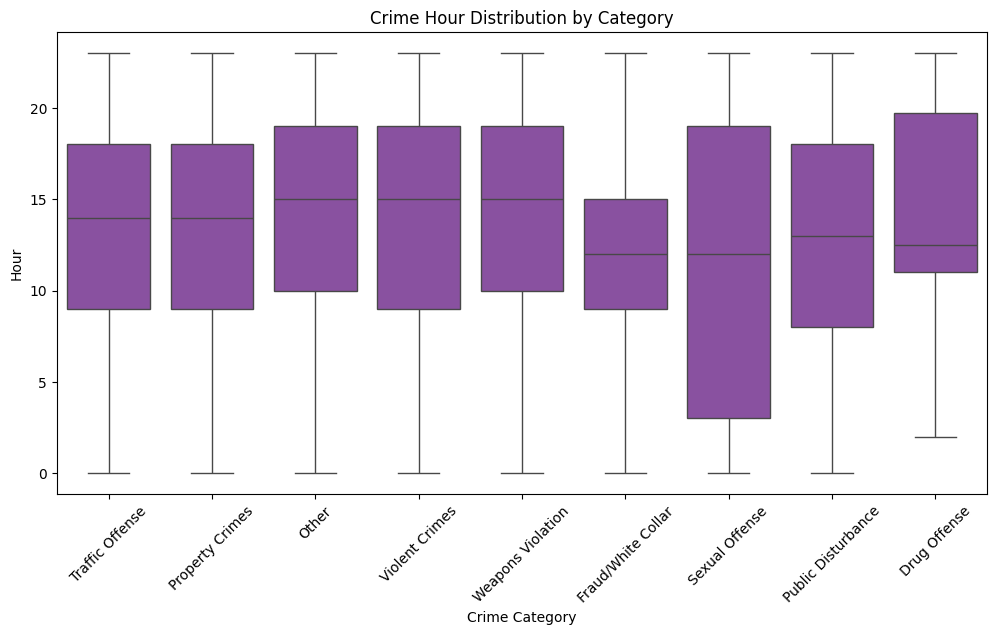

In [260]:
# Crime Hour Distribution by Category    
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Crime Category', y='Hour', color = '#8e44ad')
plt.title("Crime Hour Distribution by Category")
plt.xticks(rotation=45)
plt.show()

## Crime Categories Over the Years

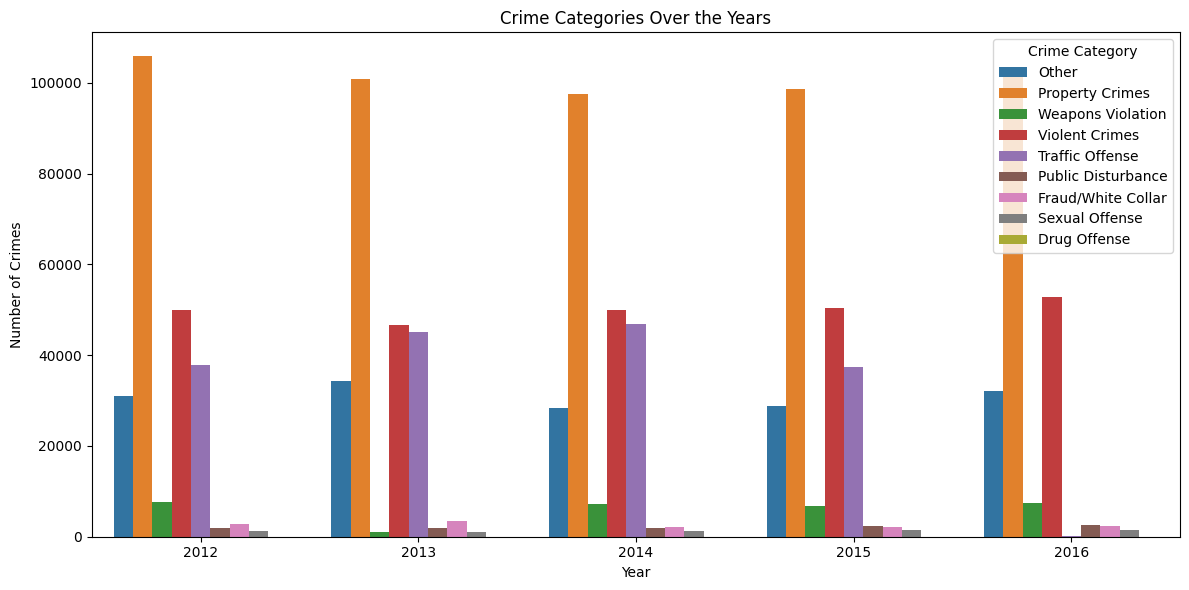

In [261]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year', hue='Crime Category')
plt.title("Crime Categories Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()

## Summary of Key Findings

We conclude the notebook with a brief recap of major patterns in the data.

In [262]:
print("Most crimes occurred in:", topAreas.index[0])
print("Peak crime month:", df['Month'].mode()[0])
print("Peak crime hour:", df['Hour'].mode()[0])
print("Most common crime category:", df['Crime Category'].mode()[0])

Most crimes occurred in: 77th Street
Peak crime month: 8
Peak crime hour: 12
Most common crime category: Property Crimes
